In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file_path = '/content/Task Data.xlsx'
data = pd.read_excel(file_path)

In [3]:
data.head()

Ticket ID Created Date Created Time Assigned To First Response Time  \
0  7339585423   01/04/2024     00:00:17    Agent 39            13:48:07   
1  7339585424   01/04/2024     00:01:30    Agent 39            13:50:51   
2  7339585425   01/04/2024     00:04:19    Agent 39            13:53:11   
3  7339585426   01/04/2024     00:05:18    Agent 39                 NaN   
4  7339585427   01/04/2024     00:06:17    Agent 39            13:56:34   

  Resolved Date Resolved Time   Source Department Issue Category  
0    01/04/2024      13:49:33     Call     Others            NaN  
1    01/04/2024      13:52:19     Call     Others            NaN  
2    01/04/2024      13:53:48     Call     Others            NaN  
3    01/04/2024      13:55:49  General     Others            NaN  
4    01/04/2024      13:58:26     Call     Others            NaN

In [4]:
# Convert columns to datetime
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Created Time'] = pd.to_datetime(data['Created Time'], format='%H:%M:%S').dt.time
data['First Response Time'] = pd.to_datetime(data['First Response Time'], format='%H:%M:%S').dt.time
data['Resolved Date'] = pd.to_datetime(data['Resolved Date'], dayfirst=True)  # Handle potential date format ambiguity
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'], format='%H:%M:%S').dt.time

# Combine date and time into single datetime columns
data['Created DateTime'] = data.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['Created Time']), axis=1)
data['First Response DateTime'] = data.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['First Response Time']) if pd.notnull(row['First Response Time']) else pd.NaT, axis=1)

# Handle missing 'Resolved Time' values before combining
data['Resolved DateTime'] = data.apply(lambda row: pd.Timestamp.combine(row['Resolved Date'], row['Resolved Time'])
                                       if pd.notnull(row['Resolved Time']) else pd.NaT, axis=1)

# Calculate FRT and ART
data['FRT'] = (data['First Response DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600
data['ART'] = (data['Resolved DateTime'] - data['Created DateTime']).dt.total_seconds() / 3600

# Display the first few rows with the new calculations
data.head()

Ticket ID Created Date Created Time Assigned To First Response Time  \
0  7339585423   2024-01-04     00:00:17    Agent 39            13:48:07   
1  7339585424   2024-01-04     00:01:30    Agent 39            13:50:51   
2  7339585425   2024-01-04     00:04:19    Agent 39            13:53:11   
3  7339585426   2024-01-04     00:05:18    Agent 39                 NaT   
4  7339585427   2024-01-04     00:06:17    Agent 39            13:56:34   

  Resolved Date Resolved Time   Source Department Issue Category  \
0    2024-04-01      13:49:33     Call     Others            NaN   
1    2024-04-01      13:52:19     Call     Others            NaN   
2    2024-04-01      13:53:48     Call     Others            NaN   
3    2024-04-01      13:55:49  General     Others            NaN   
4    2024-04-01      13:58:26     Call     Others            NaN   

     Created DateTime First Response DateTime   Resolved DateTime        FRT  \
0 2024-01-04 00:00:17     2024-01-04 13:48:07 2024-04-01 13:49:33  13.797222   
1 2024-01-04 00:01:30     2024-01-04 13:50:51 2024-04-01 13:52:19  13.822500   
2 2024-01-04 00:04:19     2024-01-04 13:53:11 2024-04-01 13:53:48  13.814444   
3 2024-01-04 00:05:18                     NaT 2024-04-01 13:55:49        NaN   
4 2024-01-04 00:06:17     2024-01-04 13:56:34 2024-04-01 13:58:26  13.838056   

           ART  
0  2125.821111  
1  2125.846944  
2  2125.824722  
3  2125.841944  
4  2125.869167

In [5]:
# Filter out negative FRT and ART values
filtered_data = data[(data['FRT'] > 0) & (data['ART'] > 0)]

print(filtered_data[['FRT', 'ART']])

            FRT          ART
0     13.797222  2125.821111
1     13.822500  2125.846944
2     13.814444  2125.824722
4     13.838056  2125.869167
5     13.862222  2126.990833
...         ...          ...
5907   0.168611    12.396944
5912   0.013333     0.418889
5914   0.091111     9.815278
5915   0.007778     8.632778
5916   0.004444     8.150278

[2512 rows x 2 columns]


In [6]:
# Verify that there are no negative values in FRT and ART
print(f"Negative FRT values: {filtered_data['FRT'][filtered_data['FRT'] < 0].count()}")
print(f"Negative ART values: {filtered_data['ART'][filtered_data['ART'] < 0].count()}")

Negative FRT values: 0
Negative ART values: 0


In [7]:
print(len(filtered_data))

2512


In [8]:
# Convert columns to datetime
filtered_data['Created Date'] = pd.to_datetime(filtered_data['Created Date'])
filtered_data['Created Time'] = pd.to_datetime(filtered_data['Created Time'], format='%H:%M:%S').dt.time
filtered_data['First Response Time'] = pd.to_datetime(filtered_data['First Response Time'], format='%H:%M:%S').dt.time
filtered_data['Resolved Date'] = pd.to_datetime(filtered_data['Resolved Date'], dayfirst=True)
filtered_data['Resolved Time'] = pd.to_datetime(filtered_data['Resolved Time'], format='%H:%M:%S').dt.time

# Combine date and time into single datetime columns
filtered_data['Created DateTime'] = filtered_data.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['Created Time']), axis=1)
filtered_data['First Response DateTime'] = filtered_data.apply(lambda row: pd.Timestamp.combine(row['Created Date'], row['First Response Time']) if pd.notnull(row['First Response Time']) else pd.NaT, axis=1)

# Handle missing 'Resolved Time' values before combining
filtered_data['Resolved DateTime'] = filtered_data.apply(lambda row: pd.Timestamp.combine(row['Resolved Date'], row['Resolved Time'])
if pd.notnull(row['Resolved Time']) else pd.NaT, axis=1)

# Calculate FRT and ART
filtered_data['FRT'] = (filtered_data['First Response DateTime'] - filtered_data['Created DateTime']).dt.total_seconds() / 3600
filtered_data['ART'] = (filtered_data['Resolved DateTime'] - filtered_data['Created DateTime']).dt.total_seconds() / 3600

# Display the first few rows with the new calculations
filtered_data.head()


<ipython-input-8-41db6ec085d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Created Date'] = pd.to_datetime(filtered_data['Created Date'])
<ipython-input-8-41db6ec085d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Created Time'] = pd.to_datetime(filtered_data['Created Time'], format='%H:%M:%S').dt.time
<ipython-input-8-41db6ec085d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Ticket ID Created Date Created Time Assigned To First Response Time  \
0  7339585423   2024-01-04     00:00:17    Agent 39            13:48:07   
1  7339585424   2024-01-04     00:01:30    Agent 39            13:50:51   
2  7339585425   2024-01-04     00:04:19    Agent 39            13:53:11   
4  7339585427   2024-01-04     00:06:17    Agent 39            13:56:34   
5  7339585428   2024-01-04     00:07:28    Agent 39            13:59:12   

  Resolved Date Resolved Time Source Department Issue Category  \
0    2024-04-01      13:49:33   Call     Others            NaN   
1    2024-04-01      13:52:19   Call     Others            NaN   
2    2024-04-01      13:53:48   Call     Others            NaN   
4    2024-04-01      13:58:26   Call     Others            NaN   
5    2024-04-01      15:06:55   Call     Others            NaN   

     Created DateTime First Response DateTime   Resolved DateTime        FRT  \
0 2024-01-04 00:00:17     2024-01-04 13:48:07 2024-04-01 13:49:33  13.797222   
1 2024-01-04 00:01:30     2024-01-04 13:50:51 2024-04-01 13:52:19  13.822500   
2 2024-01-04 00:04:19     2024-01-04 13:53:11 2024-04-01 13:53:48  13.814444   
4 2024-01-04 00:06:17     2024-01-04 13:56:34 2024-04-01 13:58:26  13.838056   
5 2024-01-04 00:07:28     2024-01-04 13:59:12 2024-04-01 15:06:55  13.862222   

           ART  
0  2125.821111  
1  2125.846944  
2  2125.824722  
4  2125.869167  
5  2126.990833

In [9]:
num_columns = data.shape[1]

print("Number of columns:", num_columns)

Number of columns: 15


#1 - Trends with ticket generation and resolution

In [10]:
# Convert 'Created Date' to datetime, handling potential errors
data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')

# Group by Created Date to get the number of tickets created each day
tickets_per_day = data.groupby(data['Created Date'].dt.date).size()

print(tickets_per_day)

Created Date
2024-01-04    1265
2024-02-04    1291
2024-03-04    1453
2024-04-04    1975
2024-05-04     988
2024-06-04    1338
2024-07-04    1304
2024-08-04    1228
2024-09-04     793
2024-10-04    1181
dtype: int64


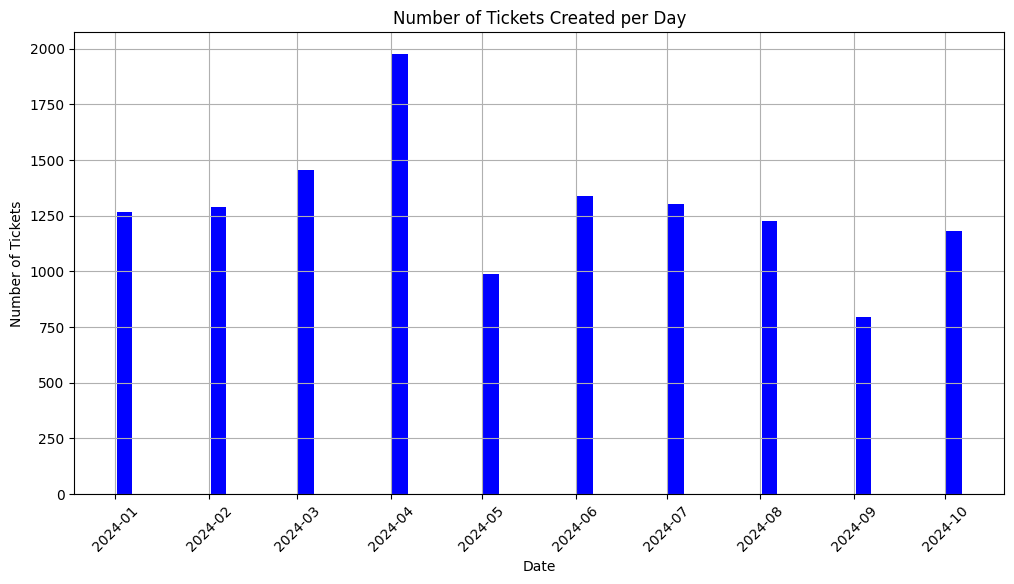

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(tickets_per_day.index, tickets_per_day.values, color='b', width = 5.2)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Created per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Group by Created Date to get the number of tickets created each day
tickets_per_day1 = filtered_data.groupby(data['Created Date'].dt.date).size()

print(tickets_per_day1)

Created Date
2024-01-04    515
2024-02-04    586
2024-03-04    532
2024-04-04    879
dtype: int64


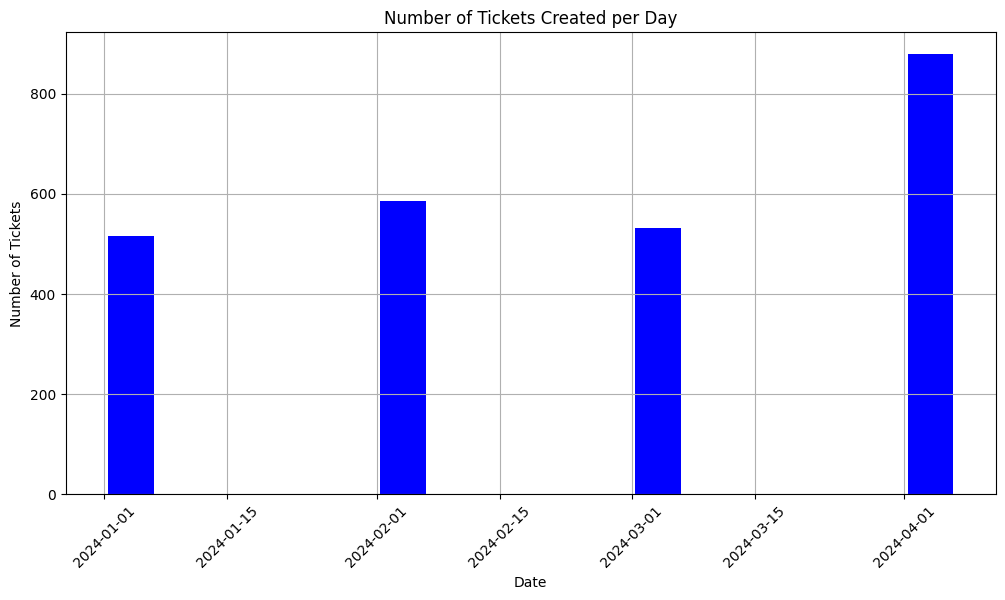

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(tickets_per_day1.index, tickets_per_day1.values, color='b', width = 5.2)
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.title('Number of Tickets Created per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [14]:
data['Resolved Date'] = pd.to_datetime(data['Resolved Date'], errors='coerce')

# Group by Resolved Date to get the number of tickets resolved each day
tickets_resolved_per_day = data.groupby(data['Resolved Date'].dt.date).size()

print(tickets_resolved_per_day)

Resolved Date
2024-04-01    1058
2024-04-02    1193
2024-04-03    1398
2024-04-04    1748
2024-04-05     974
2024-04-06    1201
2024-04-07    1187
2024-04-08    1160
2024-04-09     817
2024-04-10    1037
2024-04-11      53
2024-04-12      41
2024-04-13       7
2024-04-14       3
2024-04-15       6
2024-04-16       3
2024-04-17     118
2024-04-18       2
2024-04-30       1
2024-05-01       1
2024-05-04       1
2024-05-10       1
dtype: int64


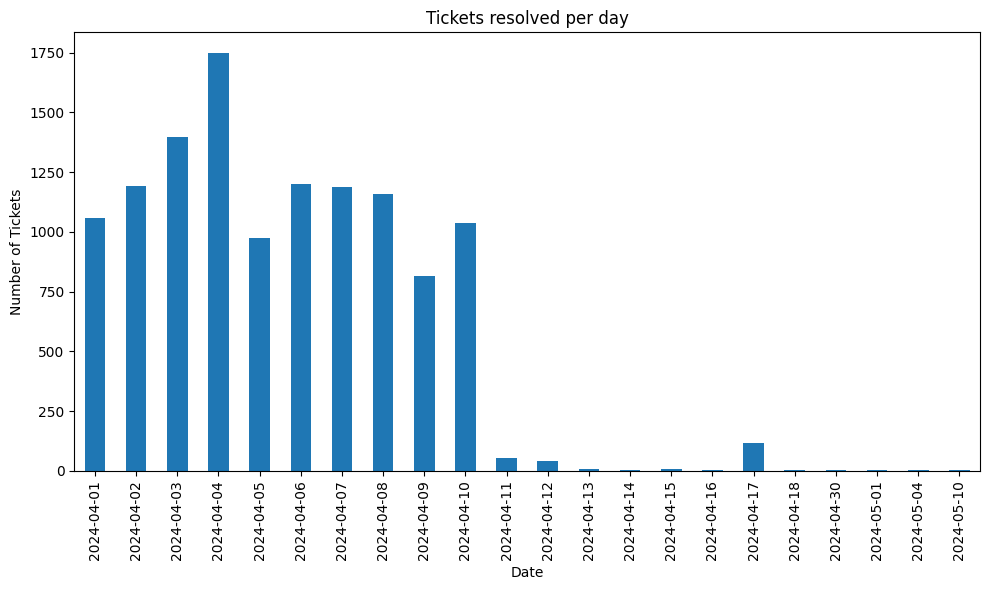

In [15]:
plt.figure(figsize=(10, 6))
tickets_resolved_per_day.plot(kind='bar')
plt.title('Tickets resolved per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Group by Resolved Date to get the number of tickets resolved each day
tickets_resolved_per_day1 = filtered_data.groupby(data['Resolved Date'].dt.date).size()

print(tickets_resolved_per_day1)


Resolved Date
2024-04-01    479
2024-04-02    587
2024-04-03    529
2024-04-04    863
2024-04-05     36
2024-04-06      8
2024-04-07      1
2024-04-08      1
2024-04-09      2
2024-04-15      4
2024-04-18      1
2024-05-01      1
dtype: int64


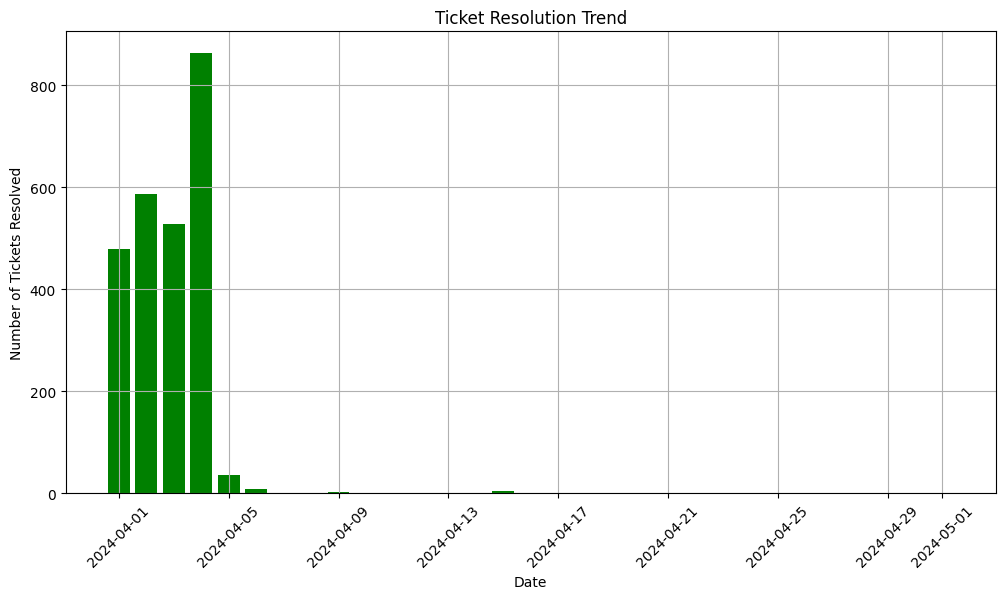

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(tickets_resolved_per_day1.index, tickets_resolved_per_day1.values, color='g')
plt.title('Ticket Resolution Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Resolved')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

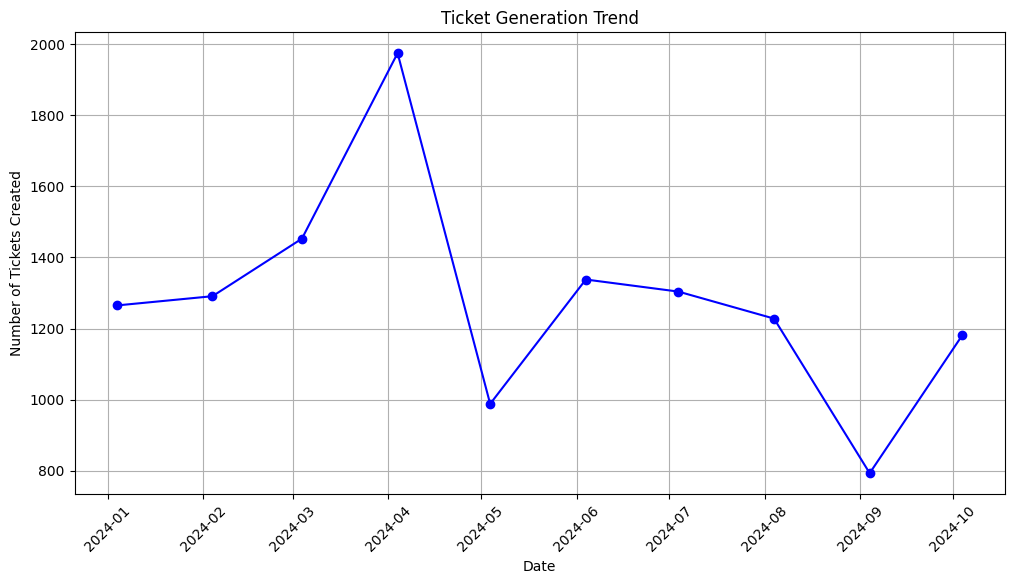

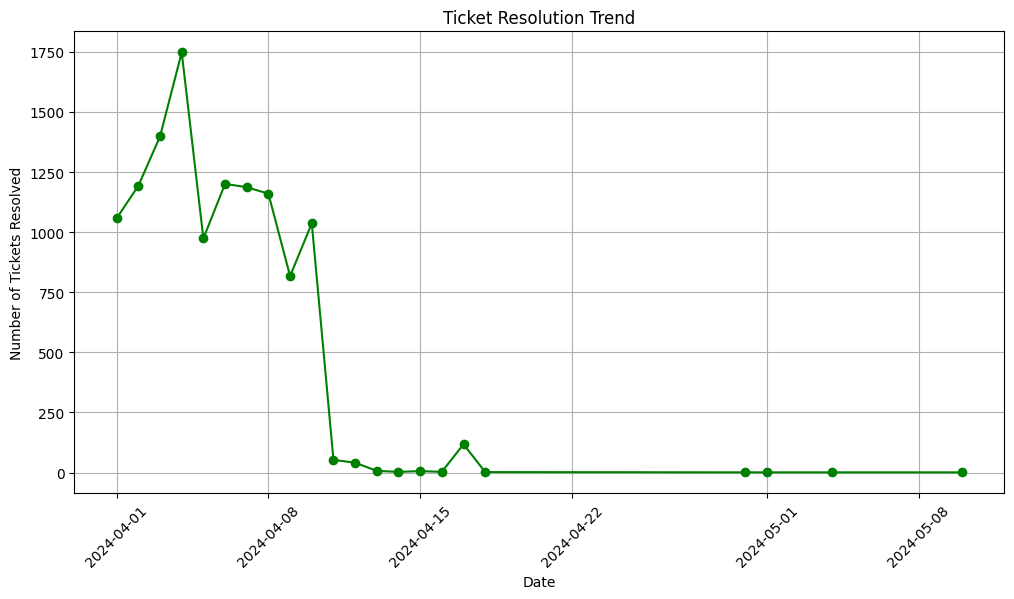

In [18]:
import matplotlib.pyplot as plt

# Plot ticket generation trend
plt.figure(figsize=(12, 6))
plt.plot(tickets_per_day.index, tickets_per_day.values, marker='o', linestyle='-', color='b')
plt.title('Ticket Generation Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Created')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot ticket resolution trend
plt.figure(figsize=(12, 6))
plt.plot(tickets_resolved_per_day.index, tickets_resolved_per_day.values, marker='o', linestyle='-', color='g')
plt.title('Ticket Resolution Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Resolved')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


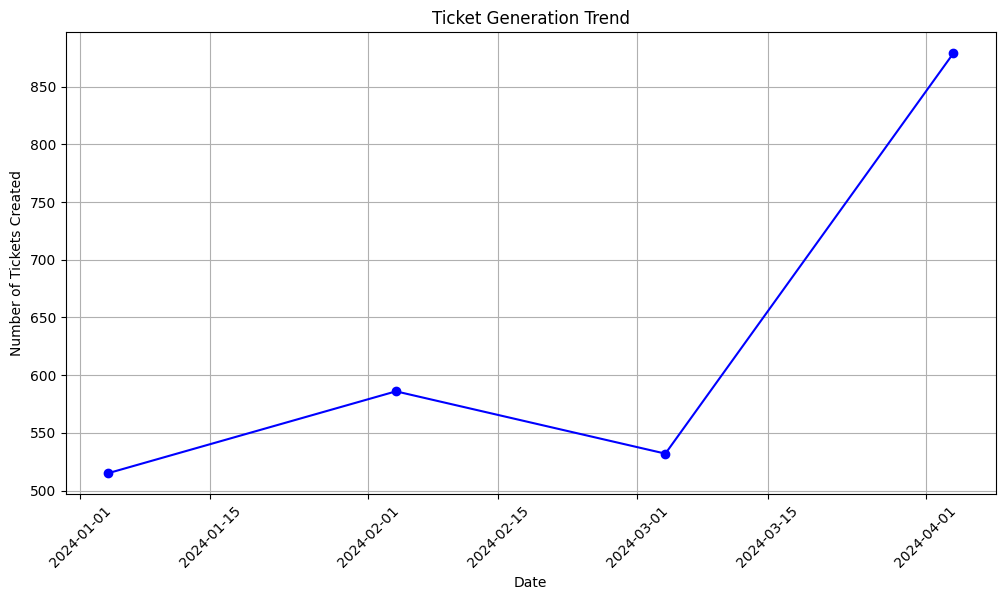

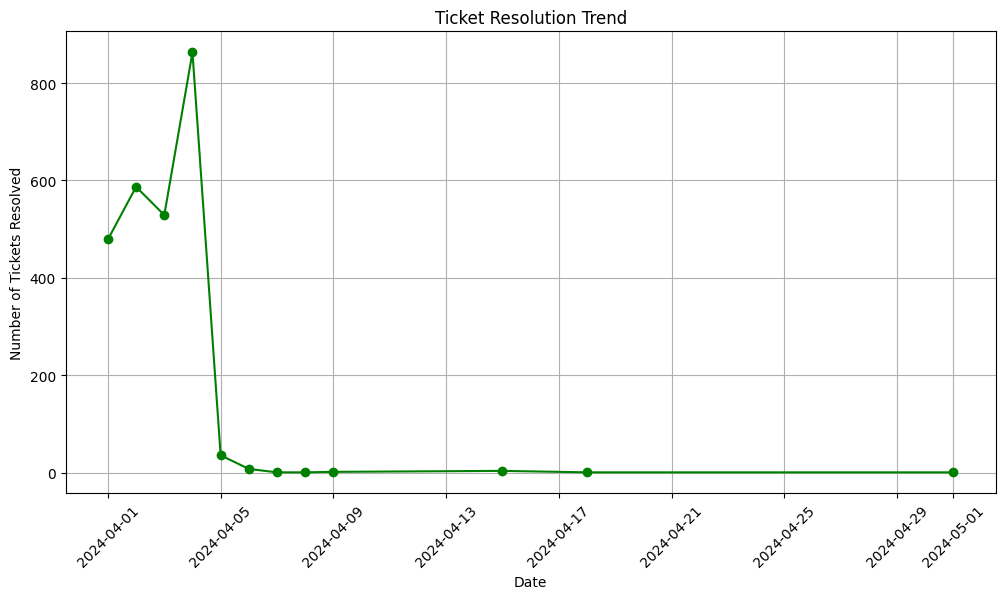

In [19]:
import matplotlib.pyplot as plt

# Plot ticket generation trend
plt.figure(figsize=(12, 6))
plt.plot(tickets_per_day1.index, tickets_per_day1.values, marker='o', linestyle='-', color='b')
plt.title('Ticket Generation Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Created')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot ticket resolution trend
plt.figure(figsize=(12, 6))
plt.plot(tickets_resolved_per_day1.index, tickets_resolved_per_day1.values, marker='o', linestyle='-', color='g')
plt.title('Ticket Resolution Trend')
plt.xlabel('Date')
plt.ylabel('Number of Tickets Resolved')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#2 - Agent Performance with respect to FRT & ART

In [20]:
# Group by Created Date and calculate the mean of FRT and ART
daily_avg_times = data.groupby(data['Created Date'].dt.date)[['FRT', 'ART']].mean()

print(daily_avg_times)

                   FRT          ART
Created Date                       
2024-01-04   -0.280882  2116.758315
2024-02-04   -0.504134  1395.317499
2024-03-04   -0.431554   723.858174
2024-04-04    0.199051     4.718188
2024-05-04   -0.234707  -691.126900
2024-06-04   -0.712723 -1411.760488
2024-07-04   -0.602876 -2107.684811
2024-08-04   -0.289259 -2827.905374
2024-09-04   -0.087398 -3546.103318
2024-10-04   -0.290819 -4230.110235


In [21]:
# Group by Created Date and calculate the mean of FRT and ART
daily_avg_times1 = filtered_data.groupby(data['Created Date'].dt.date)[['FRT', 'ART']].mean()

print(daily_avg_times1)

                   FRT          ART
Created Date                       
2024-01-04    1.349547  2116.168833
2024-02-04    1.043607  1394.919487
2024-03-04    0.996134   723.814271
2024-04-04    1.826104     6.324024


In [22]:
print(data.isnull().sum())

Ticket ID                     0
Created Date                  0
Created Time                  0
Assigned To                 125
First Response Time        1312
Resolved Date               806
Resolved Time               806
Source                        0
Department                  970
Issue Category              990
Created DateTime              0
First Response DateTime    1312
Resolved DateTime           806
FRT                        1312
ART                         806
dtype: int64


In [23]:
data["FRT"].describe()

count    11504.000000
mean        -0.313642
std          3.729502
min        -18.299722
25%          0.000000
50%          0.000000
75%          0.238750
max         14.185000
Name: FRT, dtype: float64

In [24]:
data["ART"].describe()

count    12010.000000
mean      -869.423326
std       1971.238574
min      -4248.000000
25%      -2811.170347
50%       -695.177639
75%        720.862222
max       3039.670556
Name: ART, dtype: float64

In [25]:
# Group by agent and calculate average FRT and ART
agent_performance = data.groupby('Assigned To')[['FRT', 'ART']].mean().reset_index()

print(agent_performance)

   Assigned To       FRT          ART
0      Agent 1 -0.936103  -959.155386
1     Agent 10 -0.398682  -715.011594
2     Agent 12 -0.642503  -808.904062
3     Agent 14 -0.350454  -364.345640
4     Agent 15  0.036944   -88.046667
5     Agent 16  0.188611 -1413.079444
6     Agent 17 -0.583115 -1131.150921
7     Agent 18  3.066389          NaN
8     Agent 19       NaN          NaN
9      Agent 2  0.858274  -799.052798
10    Agent 20 -0.008159  -651.213670
11    Agent 21 -0.648271  -888.089935
12    Agent 22       NaN          NaN
13    Agent 23  0.186944 -4245.286667
14    Agent 24  0.473749  -304.036332
15    Agent 25       NaN  1392.036111
16    Agent 26 -0.456313 -1051.938215
17    Agent 27  2.318478     3.303019
18    Agent 28 -0.551412  -951.609462
19    Agent 29 -0.267115 -1057.482249
20     Agent 3 -0.802412  -762.734335
21    Agent 30 -0.421468 -1112.905686
22    Agent 31  0.257732  -843.900406
23    Agent 32  0.204173  -989.082107
24    Agent 33 -0.441376 -1081.595598
25    Agent 

In [26]:
# Group by agent and calculate average FRT and ART
agent_performance1 = filtered_data.groupby('Assigned To')[['FRT', 'ART']].mean().reset_index()

print(agent_performance1)

   Assigned To       FRT          ART
0      Agent 1  0.593106  1525.098851
1     Agent 10  1.295281  1001.357726
2     Agent 12  1.122389  1205.408142
3     Agent 14  1.111806   842.121106
4     Agent 17  1.025300  1146.905885
5      Agent 2  1.659722  1245.775635
6     Agent 20  0.298355   982.815836
7     Agent 21  3.720981   486.475521
8     Agent 24  1.230075   759.048995
9     Agent 26  0.891791   837.006627
10    Agent 27  2.318478     3.303019
11    Agent 28  1.899673  1248.031808
12     Agent 3  0.617364   866.650987
13    Agent 30  3.794758  1045.884622
14    Agent 31  0.636908   693.049603
15    Agent 32  0.473808   929.918528
16    Agent 33  1.496840   793.683819
17    Agent 34  3.112778    10.542778
18    Agent 35  0.801111   658.434120
19    Agent 36  2.667348     3.190457
20    Agent 37  1.127875  1219.301174
21    Agent 38  1.142031  1023.124516
22    Agent 39  4.046566   981.093514
23     Agent 4  0.819365   594.232273
24    Agent 40  1.053386   583.018108
25    Agent 

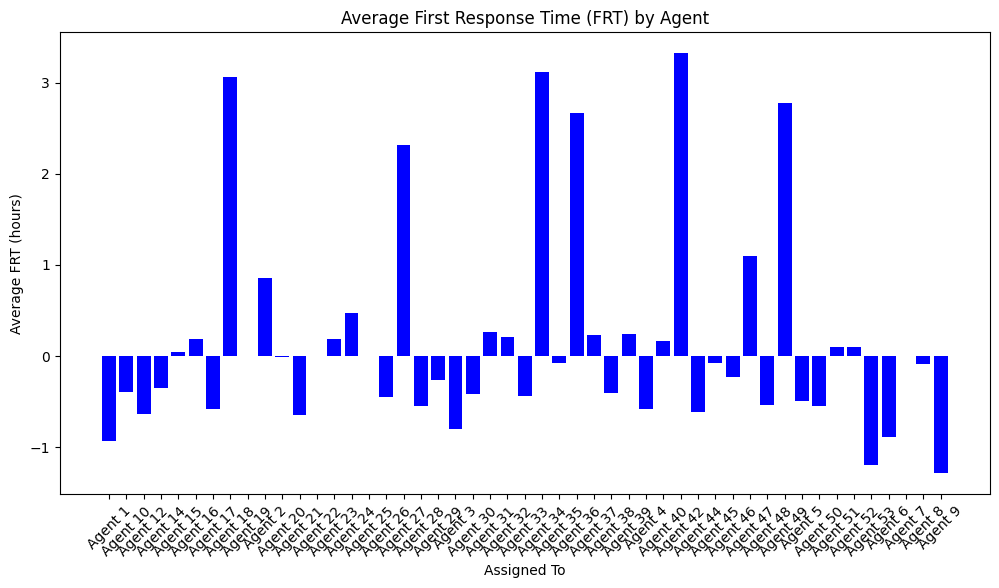

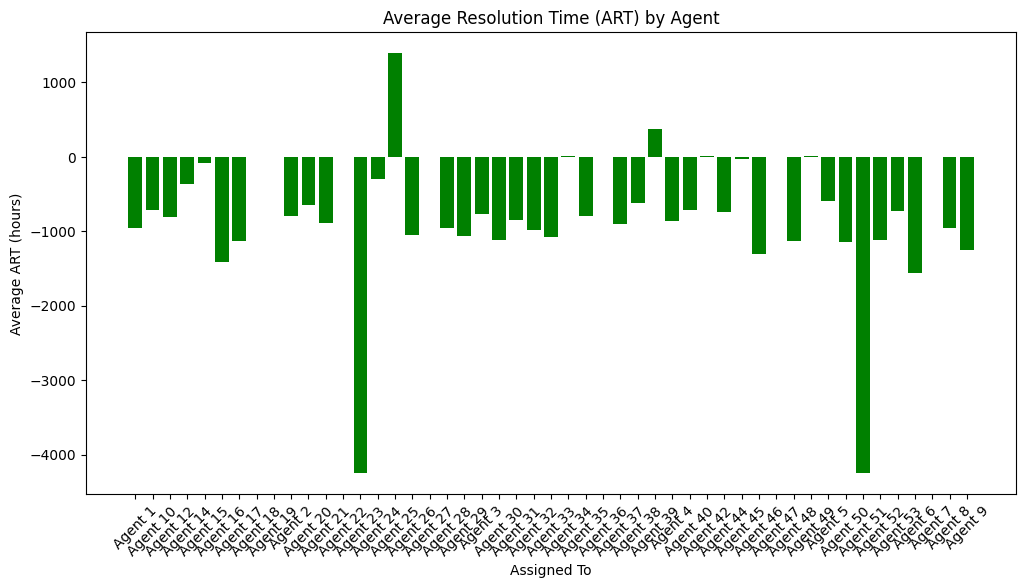

In [27]:
import matplotlib.pyplot as plt

# Bar plot for Average FRT
plt.figure(figsize=(12, 6))
plt.bar(agent_performance['Assigned To'], agent_performance['FRT'], color='b')
plt.title('Average First Response Time (FRT) by Agent')
plt.xlabel('Assigned To')
plt.ylabel('Average FRT (hours)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for Average ART
plt.figure(figsize=(12, 6))
plt.bar(agent_performance['Assigned To'], agent_performance['ART'], color='g')
plt.title('Average Resolution Time (ART) by Agent')
plt.xlabel('Assigned To')
plt.ylabel('Average ART (hours)')
plt.xticks(rotation=45)
plt.show()


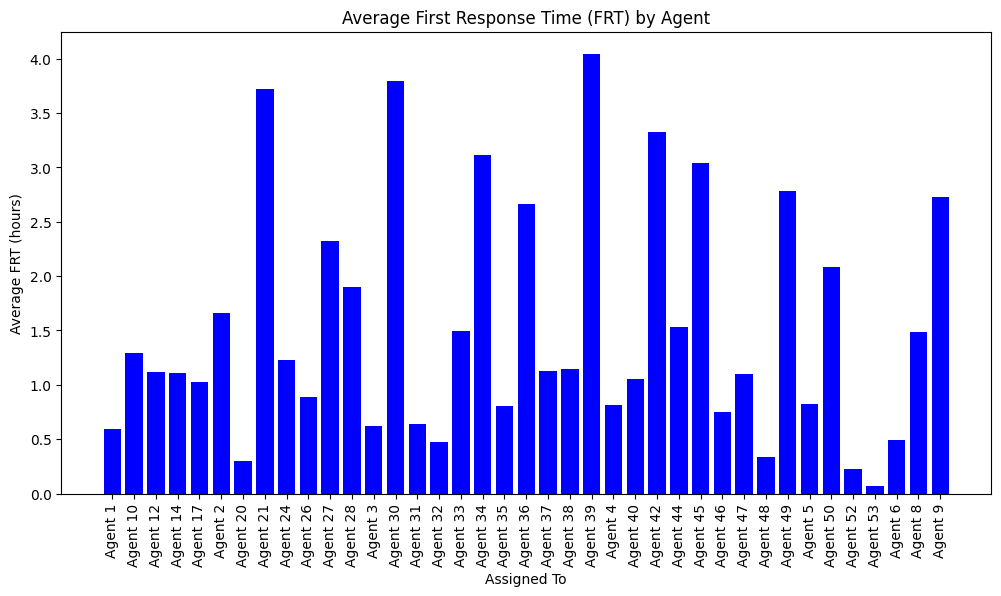

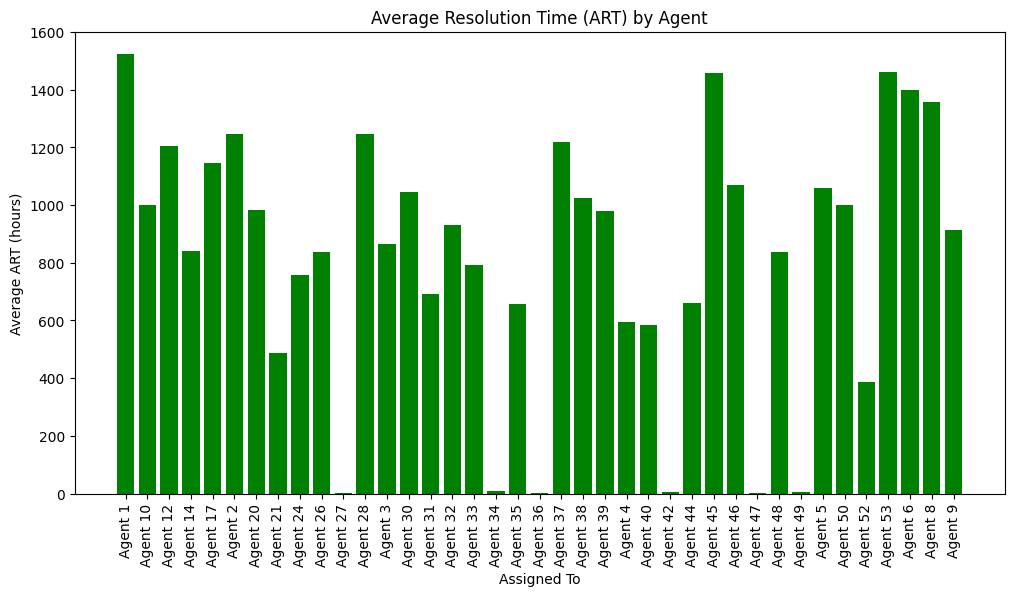

In [28]:
import matplotlib.pyplot as plt

# Bar plot for Average FRT
plt.figure(figsize=(12, 6))
plt.bar(agent_performance1['Assigned To'], agent_performance1['FRT'], color='b')
plt.title('Average First Response Time (FRT) by Agent')
plt.xlabel('Assigned To')
plt.ylabel('Average FRT (hours)')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Average ART
plt.figure(figsize=(12, 6))
plt.bar(agent_performance1['Assigned To'], agent_performance1['ART'], color='g')
plt.title('Average Resolution Time (ART) by Agent')
plt.xlabel('Assigned To')
plt.ylabel('Average ART (hours)')
plt.xticks(rotation=90)
plt.show()


#3 - Ticket contribution of Departments and Issue categories

In [29]:
# Calculate the number of tickets for each department
department_ticket_counts = data['Department'].value_counts()

# Calculate the number of tickets for each issue category
issue_category_ticket_counts = data['Issue Category'].value_counts()
print(department_ticket_counts)

Department
Marketing Team            4439
Customer Support          2441
New Leads                 2086
LOGISTICS                 1877
Feedback                   395
Payments Team              210
B2B                        179
Quality Team               159
Tech issue(New)             38
Others                      17
Follow-up Leads              4
Stalls & School Visits       1
Name: count, dtype: int64


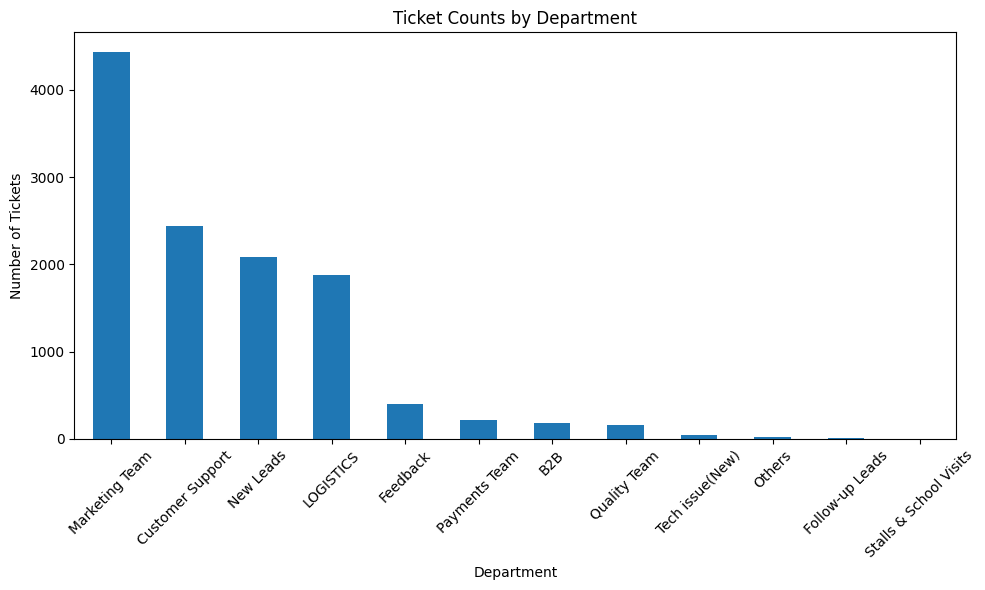

In [30]:
plt.figure(figsize=(10, 6))
department_ticket_counts.plot(kind='bar')
plt.title('Ticket Counts by Department')
plt.xlabel('Department')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
print(issue_category_ticket_counts)

Issue Category
Call Tickets        4167
Details verified    1658
Late Delivery        619
Indent Related       584
Boys info            553
                    ... 
Ghee Pouch             1
Stores Info            1
Non-edibles            1
Agent                  1
Refund                 1
Name: count, Length: 73, dtype: int64


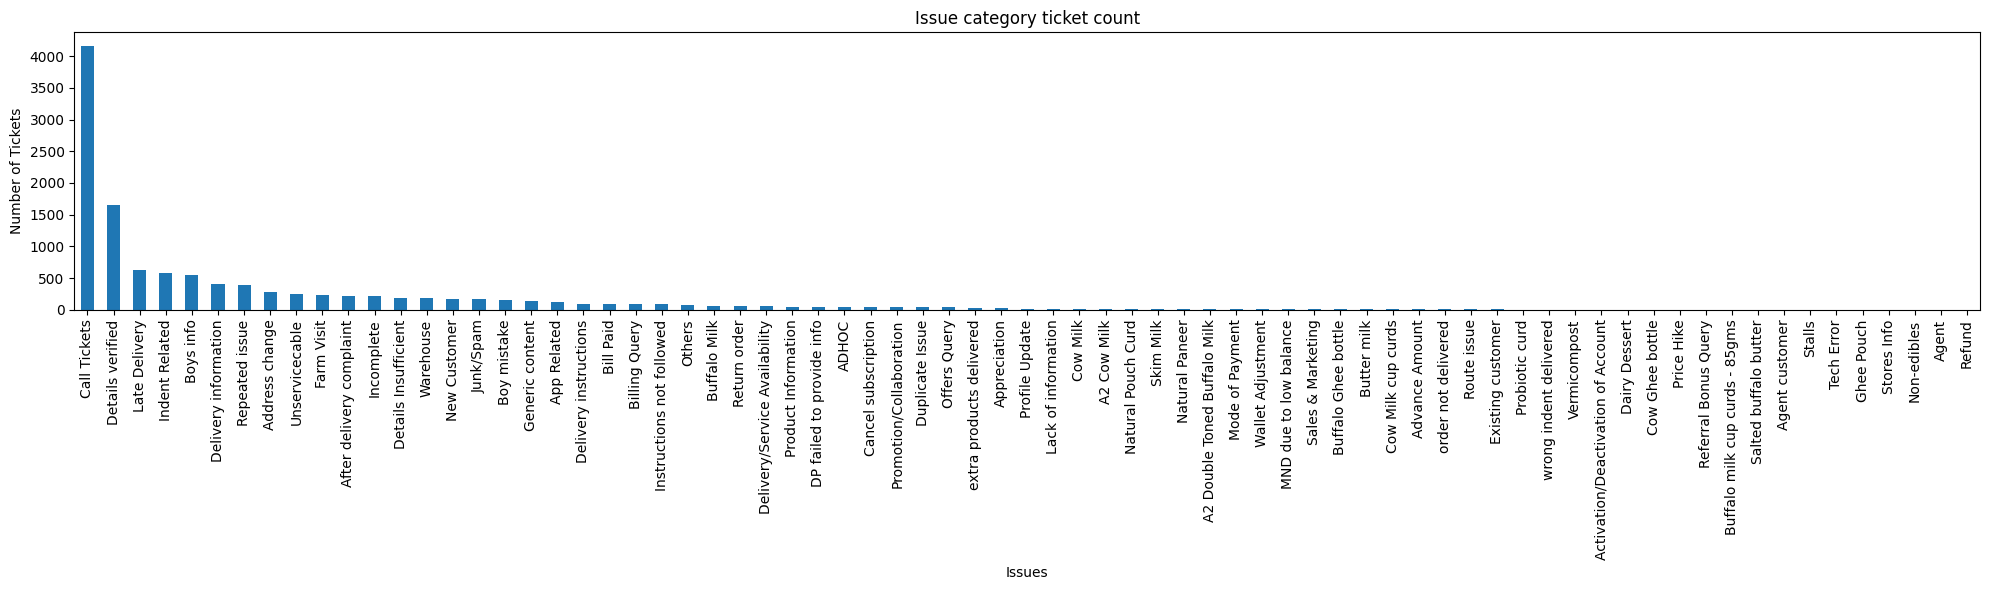

In [32]:
plt.figure(figsize=(20, 6))
issue_category_ticket_counts.plot(kind='bar')
plt.title('Issue category ticket count')
plt.xlabel('Issues')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
# Calculate the number of tickets for each department
department_ticket_counts = filtered_data['Department'].value_counts()

# Calculate the number of tickets for each issue category
issue_category_ticket_counts = filtered_data['Issue Category'].value_counts()
print(department_ticket_counts)


Department
Customer Support    826
LOGISTICS           733
New Leads           702
Payments Team        87
Marketing Team       86
Quality Team         52
Others               14
Tech issue(New)      10
Follow-up Leads       1
Feedback              1
Name: count, dtype: int64


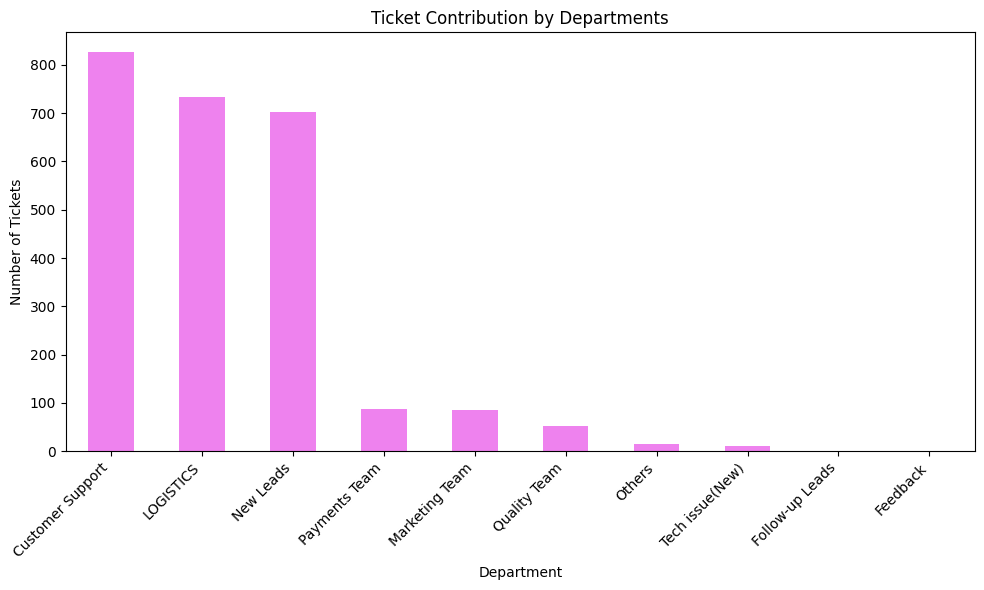

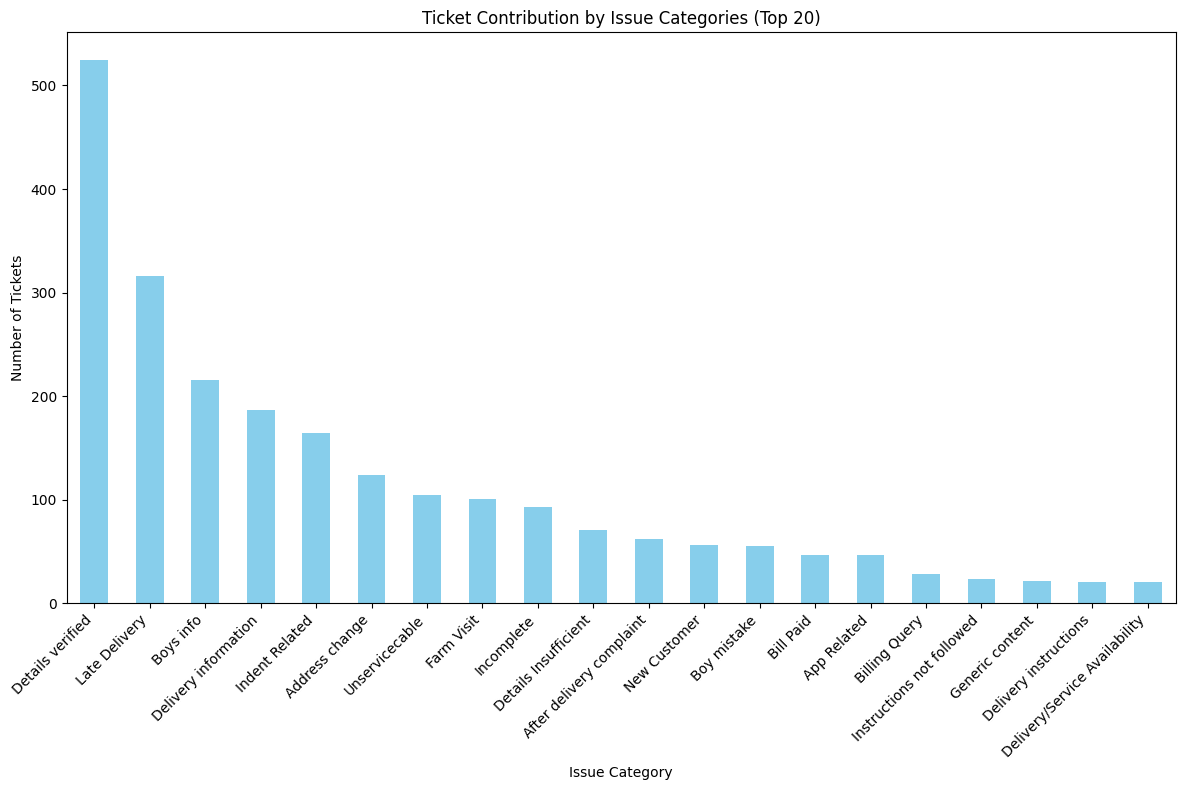

In [34]:
# Create a bar chart for ticket contributions by departments
plt.figure(figsize=(10, 6))
department_ticket_counts.plot(kind='bar', color='violet')
plt.title('Ticket Contribution by Departments')
plt.xlabel('Department')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('department_ticket_contributions.png')
plt.show()

# Create a bar chart for ticket contributions by issue categories (top 20 for clarity)
plt.figure(figsize=(12, 8))
issue_category_ticket_counts.head(20).plot(kind='bar', color='skyblue')
plt.title('Ticket Contribution by Issue Categories (Top 20)')
plt.xlabel('Issue Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('issue_category_ticket_contributions.png')
plt.show()

#4 - Correlate trends from ticket generation and resolution to the department and issue category

In [37]:
file_path = '/content/Task Data.xlsx'
data1 = pd.read_excel(file_path)

In [38]:
data1.head()

Ticket ID Created Date Created Time Assigned To First Response Time  \
0  7339585423   01/04/2024     00:00:17    Agent 39            13:48:07   
1  7339585424   01/04/2024     00:01:30    Agent 39            13:50:51   
2  7339585425   01/04/2024     00:04:19    Agent 39            13:53:11   
3  7339585426   01/04/2024     00:05:18    Agent 39                 NaN   
4  7339585427   01/04/2024     00:06:17    Agent 39            13:56:34   

  Resolved Date Resolved Time   Source Department Issue Category  
0    01/04/2024      13:49:33     Call     Others            NaN  
1    01/04/2024      13:52:19     Call     Others            NaN  
2    01/04/2024      13:53:48     Call     Others            NaN  
3    01/04/2024      13:55:49  General     Others            NaN  
4    01/04/2024      13:58:26     Call     Others            NaN

In [39]:
# Convert date and time columns to datetime format
data1['Created DateTime'] = data1['Created Date'] + ' ' + data1['Created Time']
data1['First Response DateTime'] = data1['Created Date'] + ' ' + data1['First Response Time']
data1['Resolved DateTime'] = data1['Resolved Date'] + ' ' + data1['Resolved Time']

In [43]:
# Plot the data
plt.figure(figsize=(15, 5))

# Plot Created DateTime
plt.subplot(1, 3, 1)
plt.plot(data1['Created DateTime'], label='Created DateTime', color='blue')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('Created DateTime')
plt.legend()

# Plot First Response DateTime
plt.subplot(1, 3, 2)
plt.plot(data1['First Response DateTime'], label='First Response DateTime', color='green')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('First Response DateTime')
plt.legend()

# Plot Resolved DateTime
plt.subplot(1, 3, 3)
plt.plot(data1['Resolved DateTime'], label='Resolved DateTime', color='red')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('Resolved DateTime')
plt.legend()

plt.tight_layout()
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

Error in callback <function flush_figures at 0x7fc58f983130> (for post_execute):


KeyboardInterrupt: 

In [ ]:
filtered_data

Ticket ID Created Date Created Time Assigned To First Response Time  \
0     7339585423   2024-01-04     00:00:17    Agent 39            13:48:07   
1     7339585424   2024-01-04     00:01:30    Agent 39            13:50:51   
2     7339585425   2024-01-04     00:04:19    Agent 39            13:53:11   
4     7339585427   2024-01-04     00:06:17    Agent 39            13:56:34   
5     7339585428   2024-01-04     00:07:28    Agent 39            13:59:12   
...          ...          ...          ...         ...                 ...   
5907  7339591419   2024-04-04     21:32:51    Agent 30            21:42:58   
5912  7339591424   2024-04-04     21:41:54     Agent 5            21:42:42   
5914  7339591426   2024-04-04     21:48:14    Agent 17            21:53:42   
5915  7339591427   2024-04-04     21:53:00    Agent 26            21:53:28   
5916  7339591428   2024-04-04     21:55:49    Agent 17            21:56:05   

     Resolved Date Resolved Time    Source        Department  \
0       2024-04-01      13:49:33      Call            Others   
1       2024-04-01      13:52:19      Call            Others   
2       2024-04-01      13:53:48      Call            Others   
4       2024-04-01      13:58:26      Call            Others   
5       2024-04-01      15:06:55      Call            Others   
...            ...           ...       ...               ...   
5907    2024-04-05      09:56:40      Call         New Leads   
5912    2024-04-04      22:07:02  WhatsApp    Marketing Team   
5914    2024-04-05      07:37:09  WhatsApp  Customer Support   
5915    2024-04-05      06:30:58  WhatsApp     Payments Team   
5916    2024-04-05      06:04:50  WhatsApp     Payments Team   

        Issue Category    Created DateTime First Response DateTime  \
0                  NaN 2024-01-04 00:00:17     2024-01-04 13:48:07   
1                  NaN 2024-01-04 00:01:30     2024-01-04 13:50:51   
2                  NaN 2024-01-04 00:04:19     2024-01-04 13:53:11   
4                  NaN 2024-01-04 00:06:17     2024-01-04 13:56:34   
5                  NaN 2024-01-04 00:07:28     2024-01-04 13:59:12   
...                ...                 ...                     ...   
5907  Details verified 2024-04-04 21:32:51     2024-04-04 21:42:58   
5912      New Customer 2024-04-04 21:41:54     2024-04-04 21:42:42   
5914    Address change 2024-04-04 21:48:14     2024-04-04 21:53:42   
5915     Billing Query 2024-04-04 21:53:00     2024-04-04 21:53:28   
5916         Bill Paid 2024-04-04 21:55:49     2024-04-04 21:56:05   

       Resolved DateTime        FRT          ART  
0    2024-04-01 13:49:33  13.797222  2125.821111  
1    2024-04-01 13:52:19  13.822500  2125.846944  
2    2024-04-01 13:53:48  13.814444  2125.824722  
4    2024-04-01 13:58:26  13.838056  2125.869167  
5    2024-04-01 15:06:55  13.862222  2126.990833  
...                  ...        ...          ...  
5907 2024-04-05 09:56:40   0.168611    12.396944  
5912 2024-04-04 22:07:02   0.013333     0.418889  
5914 2024-04-05 07:37:09   0.091111     9.815278  
5915 2024-04-05 06:30:58   0.007778     8.632778  
5916 2024-04-05 06:04:50   0.004444     8.150278  

[2512 rows x 15 columns]

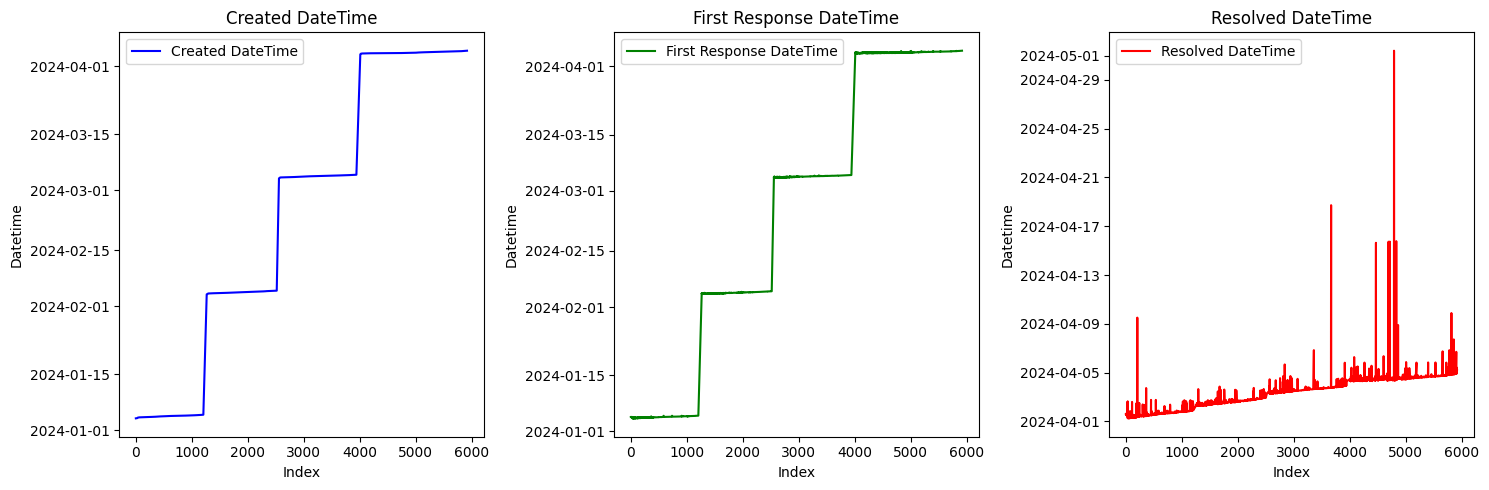

In [41]:
# Plot the data
plt.figure(figsize=(15, 5))

# Plot Created DateTime
plt.subplot(1, 3, 1)
plt.plot(filtered_data['Created DateTime'], label='Created DateTime', color='blue')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('Created DateTime')
plt.legend()

# Plot First Response DateTime
plt.subplot(1, 3, 2)
plt.plot(filtered_data['First Response DateTime'], label='First Response DateTime', color='green')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('First Response DateTime')
plt.legend()

# Plot Resolved DateTime
plt.subplot(1, 3, 3)
plt.plot(filtered_data['Resolved DateTime'], label='Resolved DateTime', color='red')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title('Resolved DateTime')
plt.legend()

plt.tight_layout()
plt.show()


#5 - Correlate FRT and ART data to the department and issue category

In [60]:
data.head()

Ticket ID Created Date Created Time Assigned To First Response Time  \
0  7339585423   2024-01-04     00:00:17    Agent 39            13:48:07   
1  7339585424   2024-01-04     00:01:30    Agent 39            13:50:51   
2  7339585425   2024-01-04     00:04:19    Agent 39            13:53:11   
3  7339585426   2024-01-04     00:05:18    Agent 39                 NaT   
4  7339585427   2024-01-04     00:06:17    Agent 39            13:56:34   

  Resolved Date Resolved Time   Source Department Issue Category  \
0    2024-04-01      13:49:33     Call     Others            NaN   
1    2024-04-01      13:52:19     Call     Others            NaN   
2    2024-04-01      13:53:48     Call     Others            NaN   
3    2024-04-01      13:55:49  General     Others            NaN   
4    2024-04-01      13:58:26     Call     Others            NaN   

     Created DateTime First Response DateTime   Resolved DateTime        FRT  \
0 2024-01-04 00:00:17     2024-01-04 13:48:07 2024-04-01 13:49:33  13.797222   
1 2024-01-04 00:01:30     2024-01-04 13:50:51 2024-04-01 13:52:19  13.822500   
2 2024-01-04 00:04:19     2024-01-04 13:53:11 2024-04-01 13:53:48  13.814444   
3 2024-01-04 00:05:18                     NaT 2024-04-01 13:55:49        NaN   
4 2024-01-04 00:06:17     2024-01-04 13:56:34 2024-04-01 13:58:26  13.838056   

           ART  
0  2125.821111  
1  2125.846944  
2  2125.824722  
3  2125.841944  
4  2125.869167

In [63]:
data['FRT']

0        13.797222
1        13.822500
2        13.814444
3              NaN
4        13.838056
           ...    
12811   -12.575556
12812   -13.408056
12813   -13.138889
12814          NaN
12815   -17.693056
Name: FRT, Length: 12816, dtype: float64

In [64]:
# Group by department and issue category and calculate average FRT and ART
avg_times_by_dept_issue = data.groupby(['Department', 'Issue Category'])[['FRT', 'ART']].mean().reset_index()

print(avg_times_by_dept_issue)


                Department                      Issue Category       FRT  \
0                      B2B                               Agent  0.000000   
1                      B2B                           Warehouse       NaN   
2         Customer Support  Activation/Deactivation of Account  0.473472   
3         Customer Support                      Address change -0.837959   
4         Customer Support                         App Related -1.432211   
..                     ...                                 ...       ...   
69  Stalls & School Visits                              Stalls       NaN   
70         Tech issue(New)                         Route issue  0.460903   
71         Tech issue(New)            extra products delivered  0.087756   
72         Tech issue(New)                 order not delivered  0.944653   
73         Tech issue(New)              wrong indent delivered  0.003056   

            ART  
0  -2831.201111  
1  -1111.210127  
2   1393.328194  
3   -340.207965

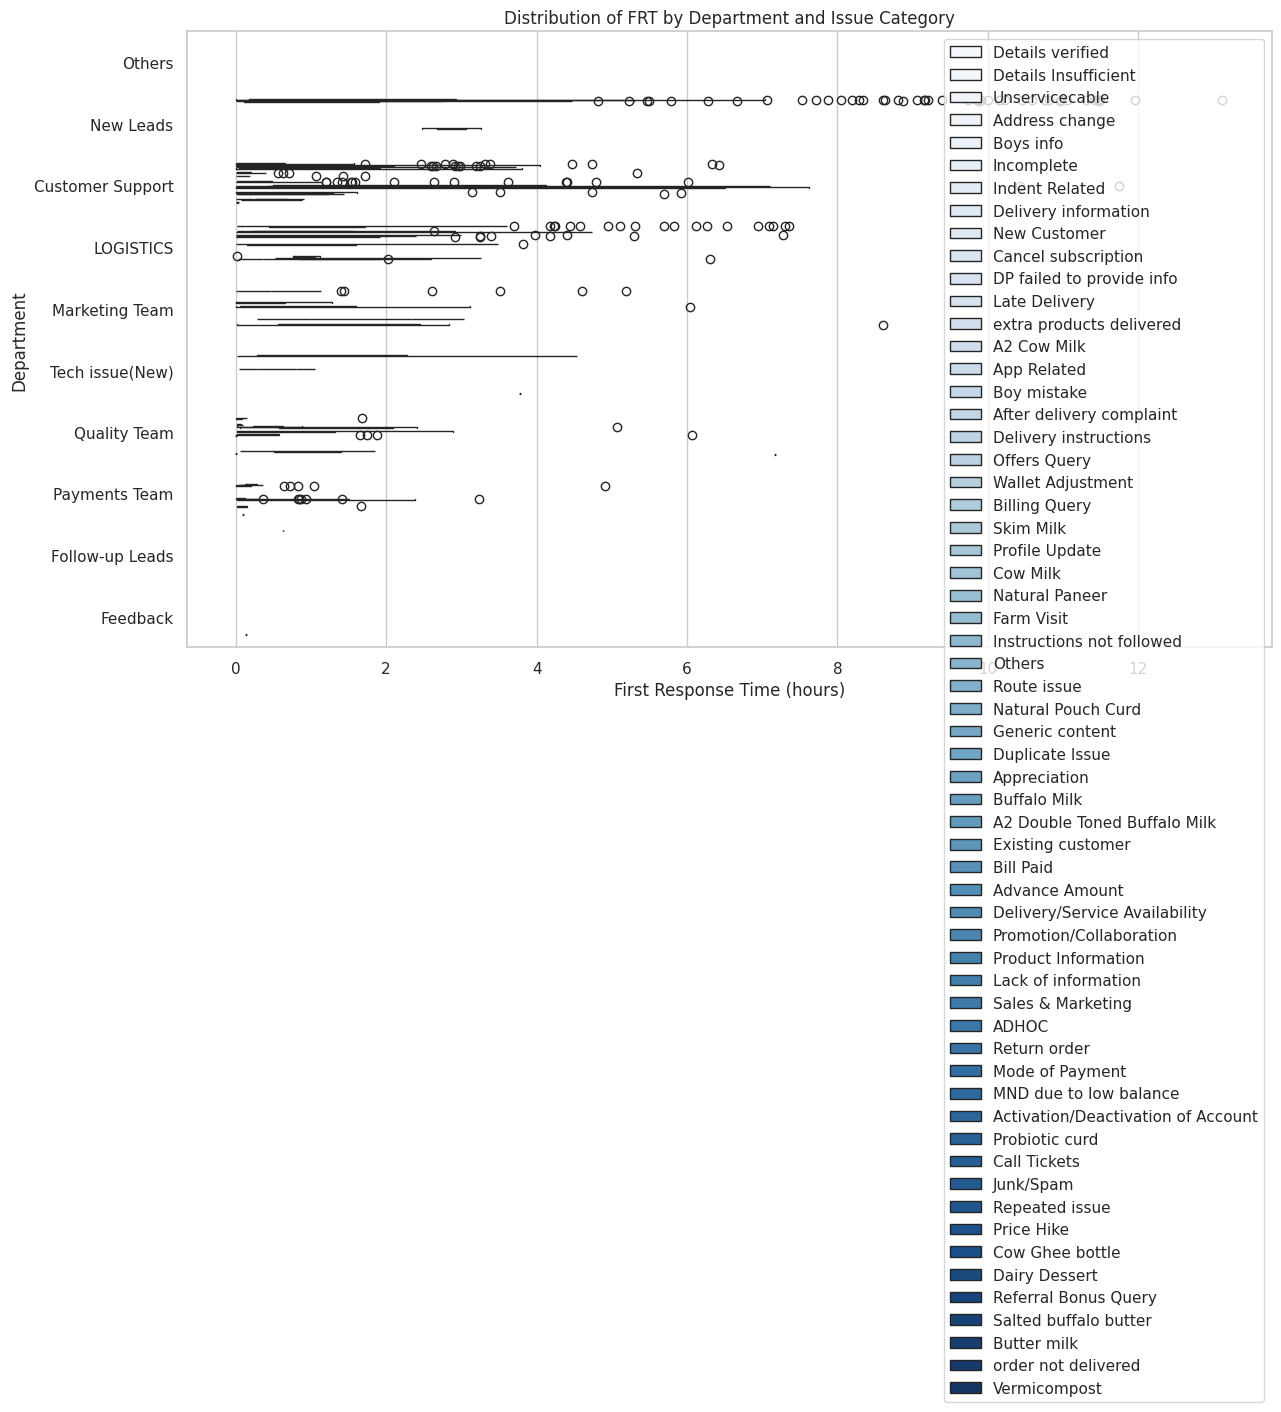

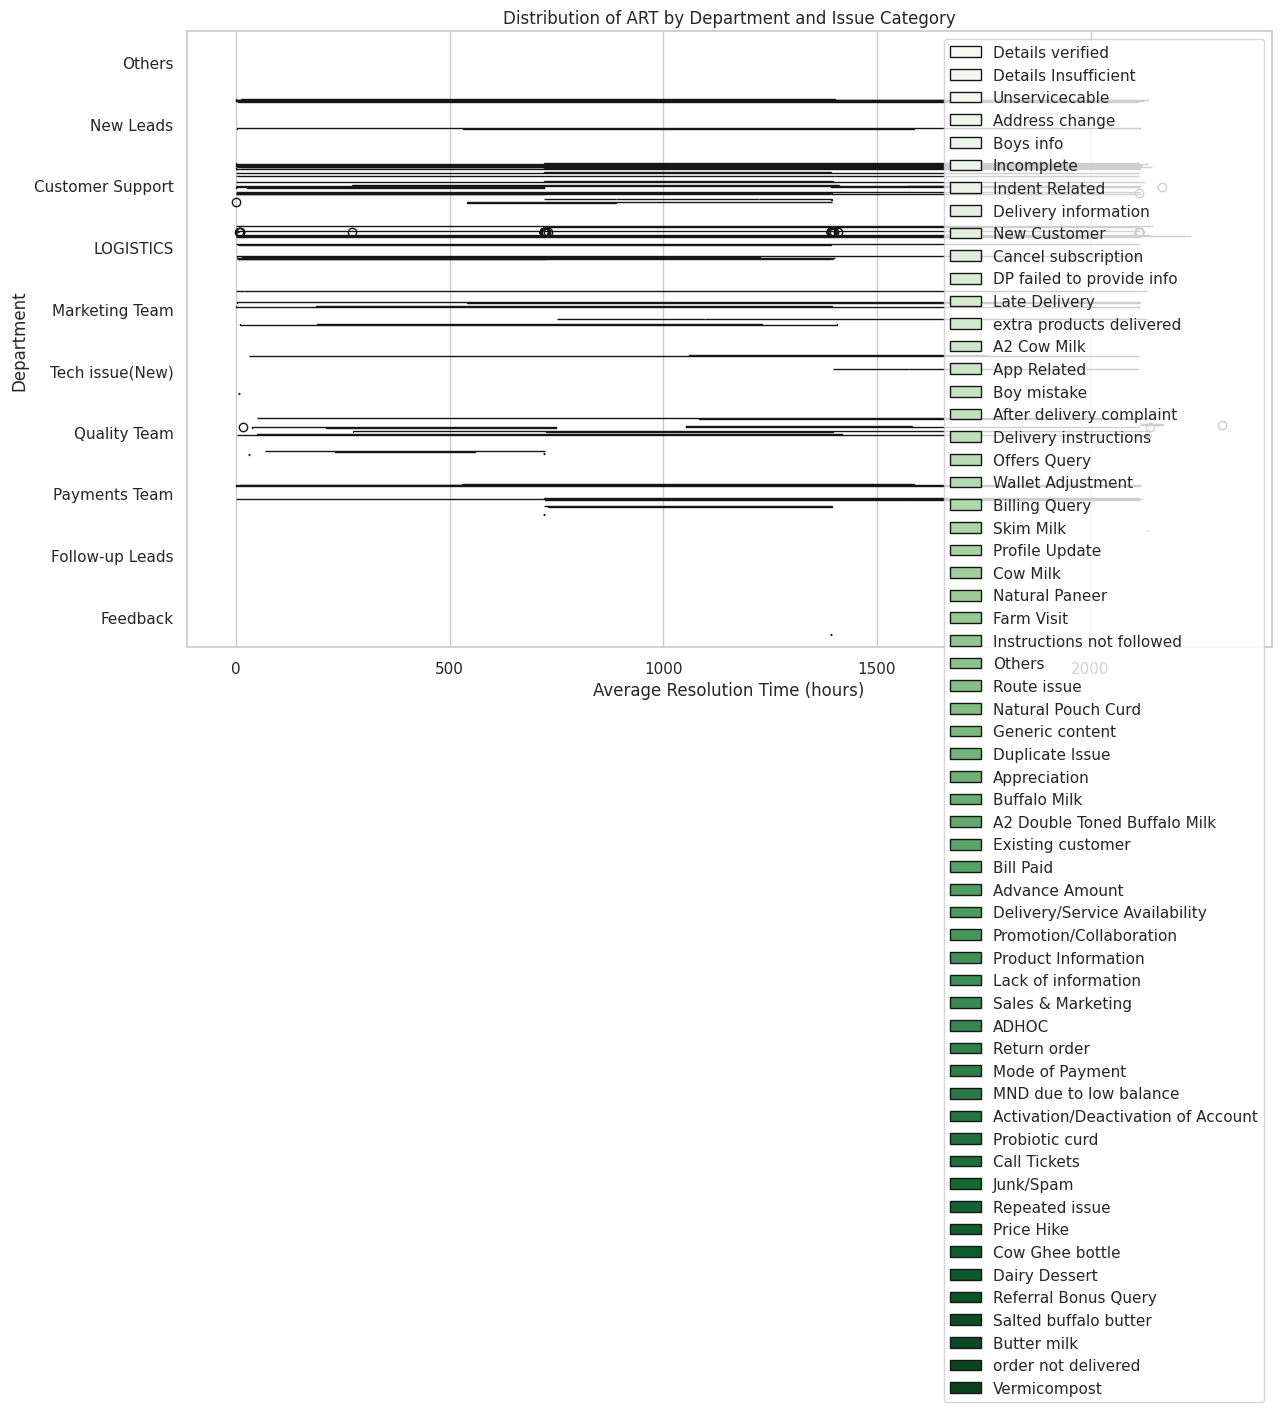

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for FRT by Department and Issue Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='FRT', y='Department', hue='Issue Category', data=filtered_data, palette='Blues')
plt.title('Distribution of FRT by Department and Issue Category')
plt.xlabel('First Response Time (hours)')
plt.ylabel('Department')
plt.legend(loc='upper right')
plt.show()

# Box plot for ART by Department and Issue Category
plt.figure(figsize=(14, 8))
sns.boxplot(x='ART', y='Department', hue='Issue Category', data=filtered_data, palette='Greens')
plt.title('Distribution of ART by Department and Issue Category')
plt.xlabel('Average Resolution Time (hours)')
plt.ylabel('Department')
plt.legend(loc='upper right')
plt.show()


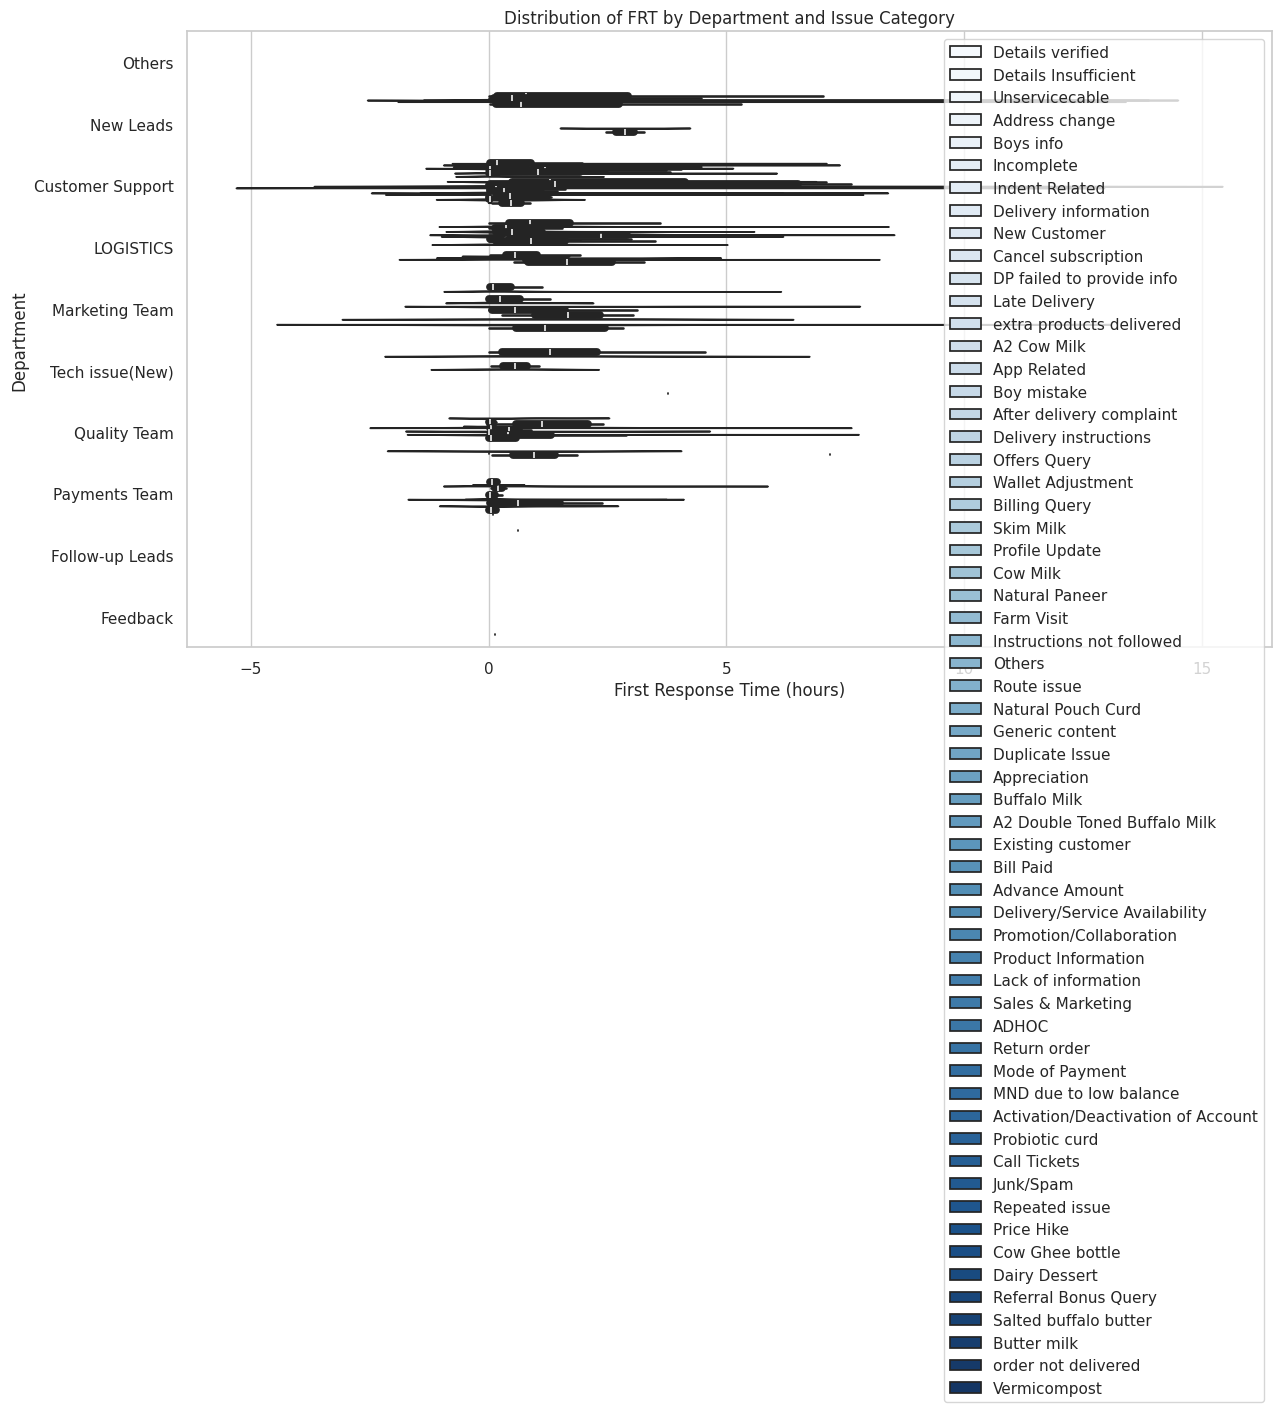

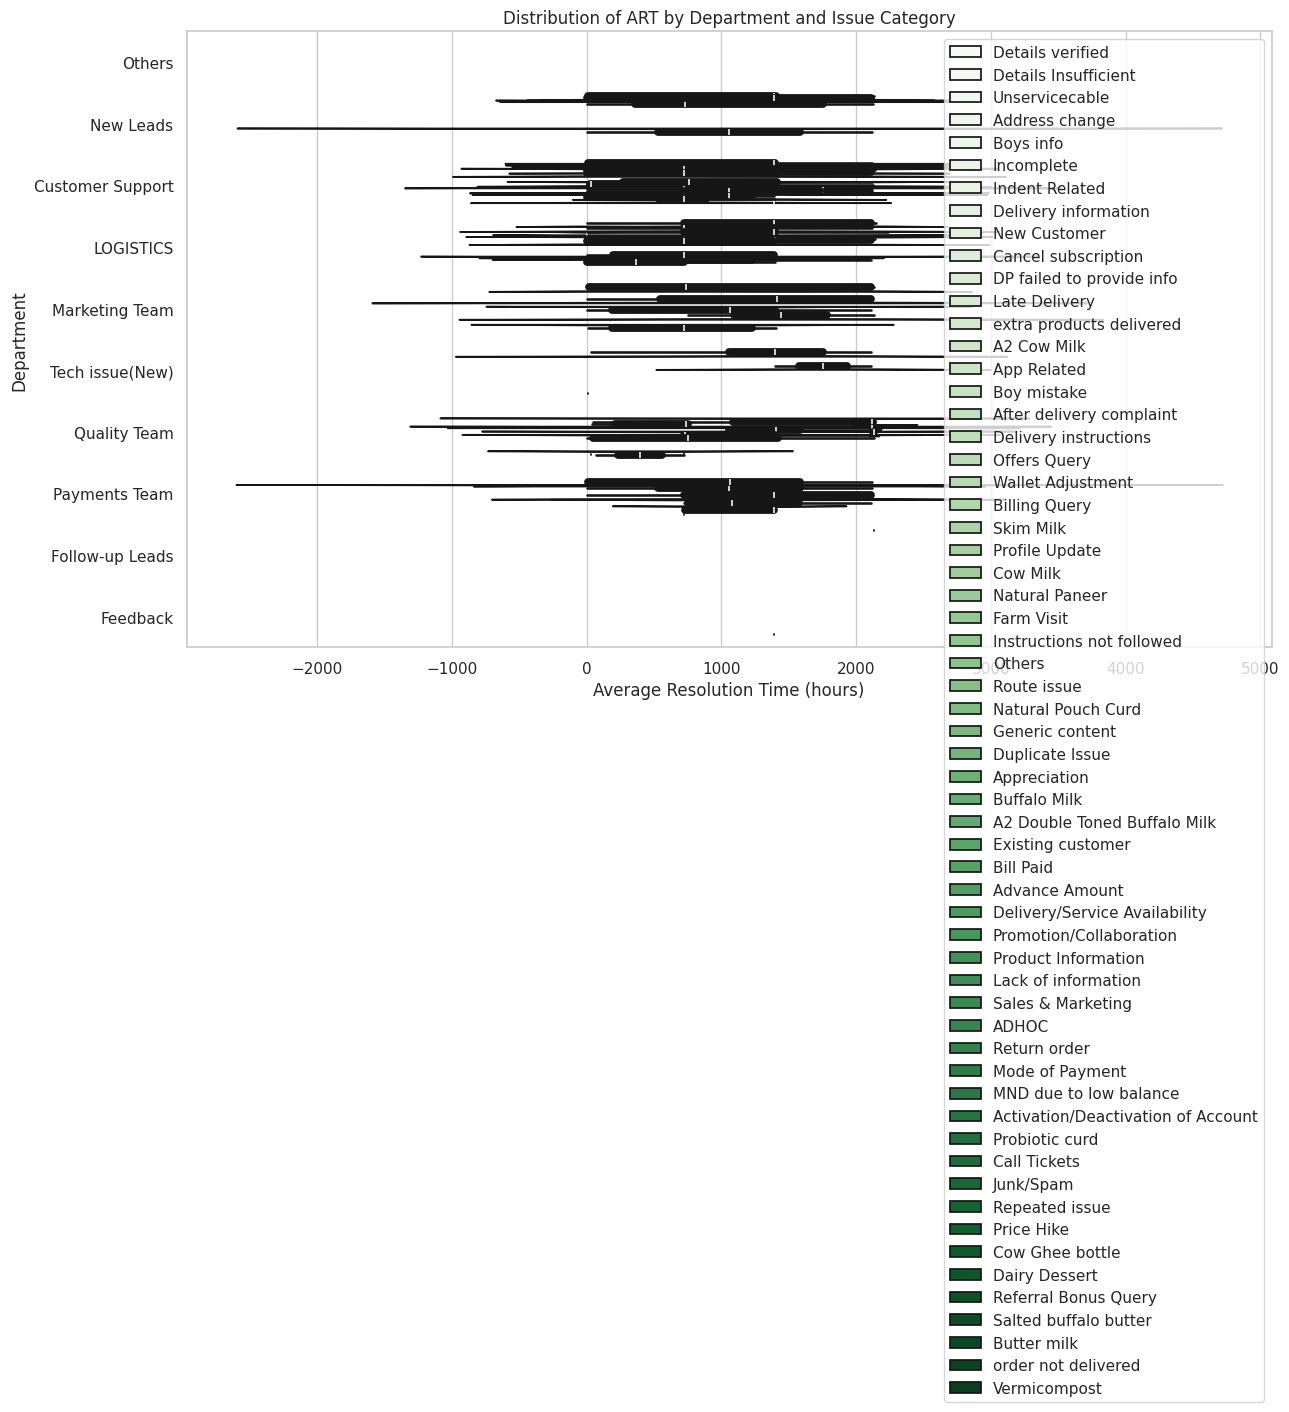

In [72]:
# Violin plot for FRT by Department and Issue Category
plt.figure(figsize=(14, 8))
sns.violinplot(x='FRT', y='Department', hue='Issue Category', data=filtered_data, split=True, palette='Blues')
plt.title('Distribution of FRT by Department and Issue Category')
plt.xlabel('First Response Time (hours)')
plt.ylabel('Department')
plt.legend(loc='upper right')
plt.show()

# Violin plot for ART by Department and Issue Category
plt.figure(figsize=(14, 8))
sns.violinplot(x='ART', y='Department', hue='Issue Category', data=filtered_data, split=True, palette='Greens')
plt.title('Distribution of ART by Department and Issue Category')
plt.xlabel('Average Resolution Time (hours)')
plt.ylabel('Department')
plt.legend(loc='upper right')
plt.show()


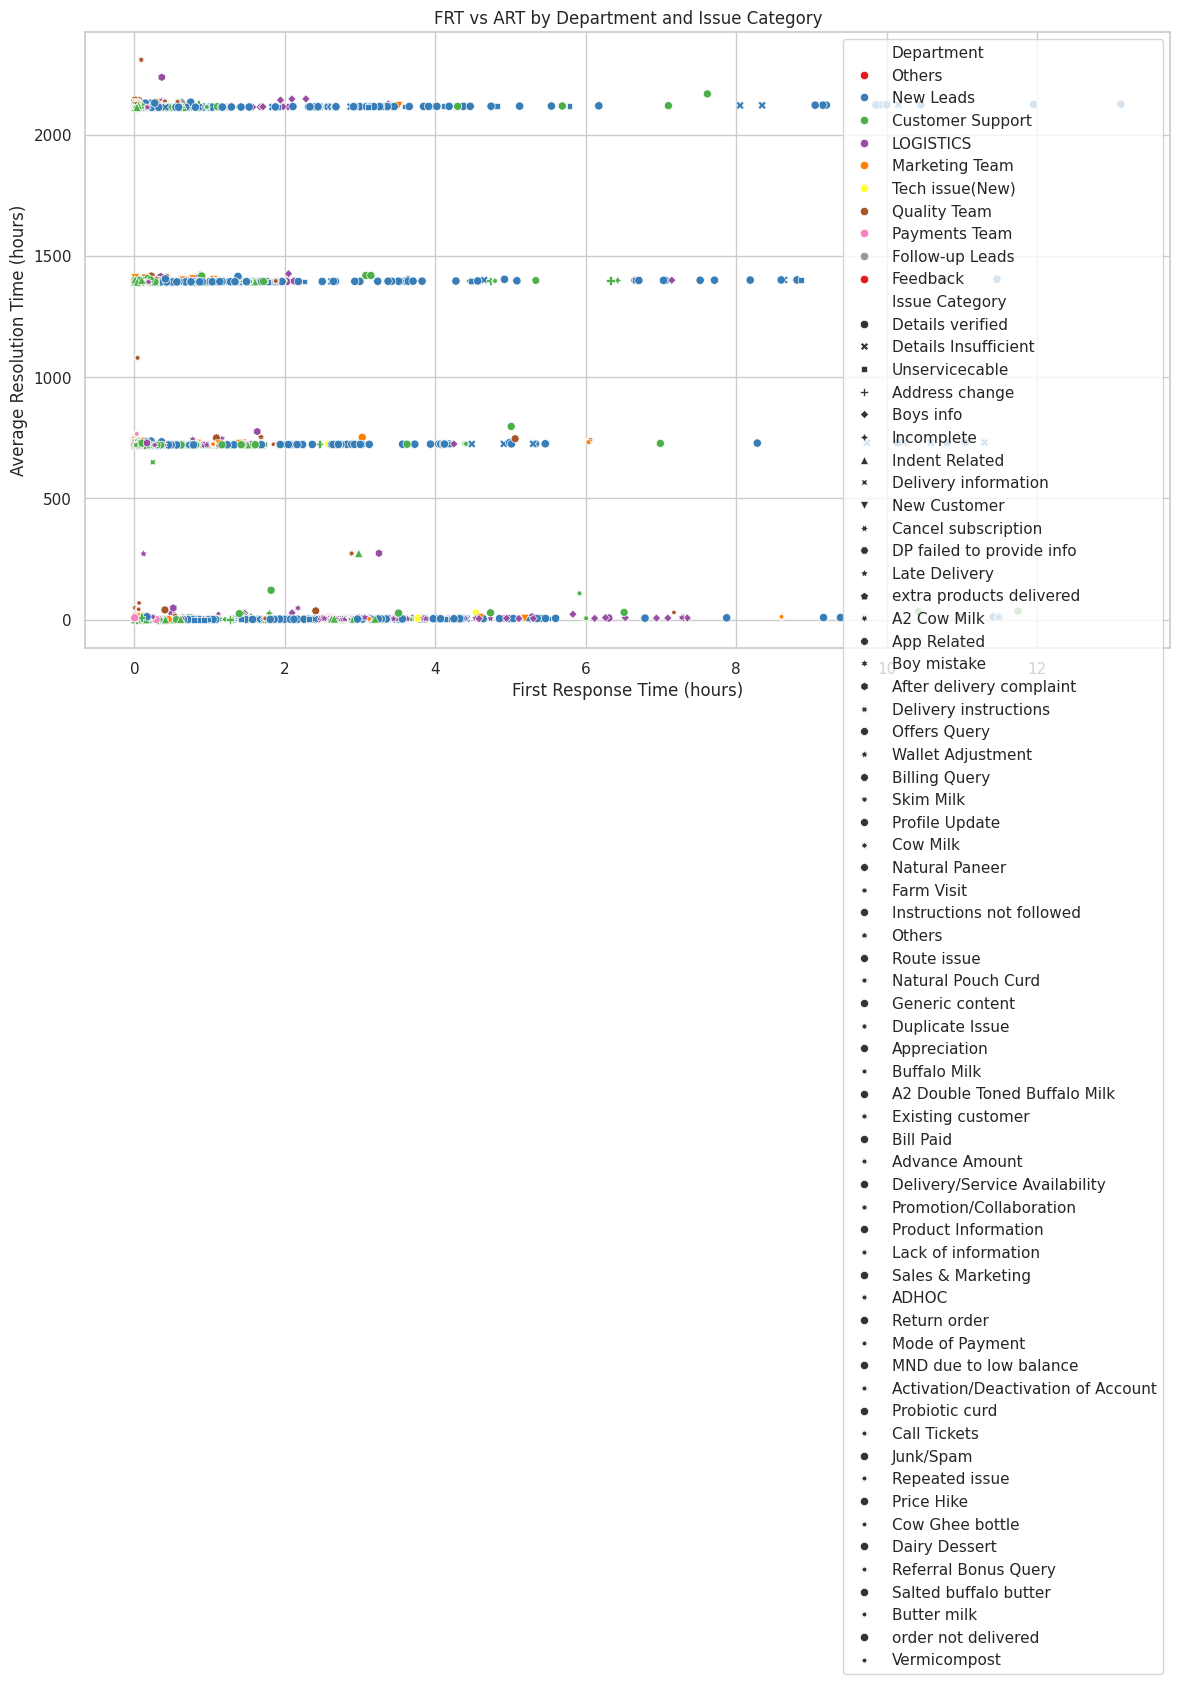

In [71]:
# Scatter plot for FRT vs ART by Department
plt.figure(figsize=(14, 8))
sns.scatterplot(x='FRT', y='ART', hue='Department', style='Issue Category', data=filtered_data, palette='Set1')
plt.title('FRT vs ART by Department and Issue Category')
plt.xlabel('First Response Time (hours)')
plt.ylabel('Average Resolution Time (hours)')
plt.legend(loc='upper right')
plt.show()


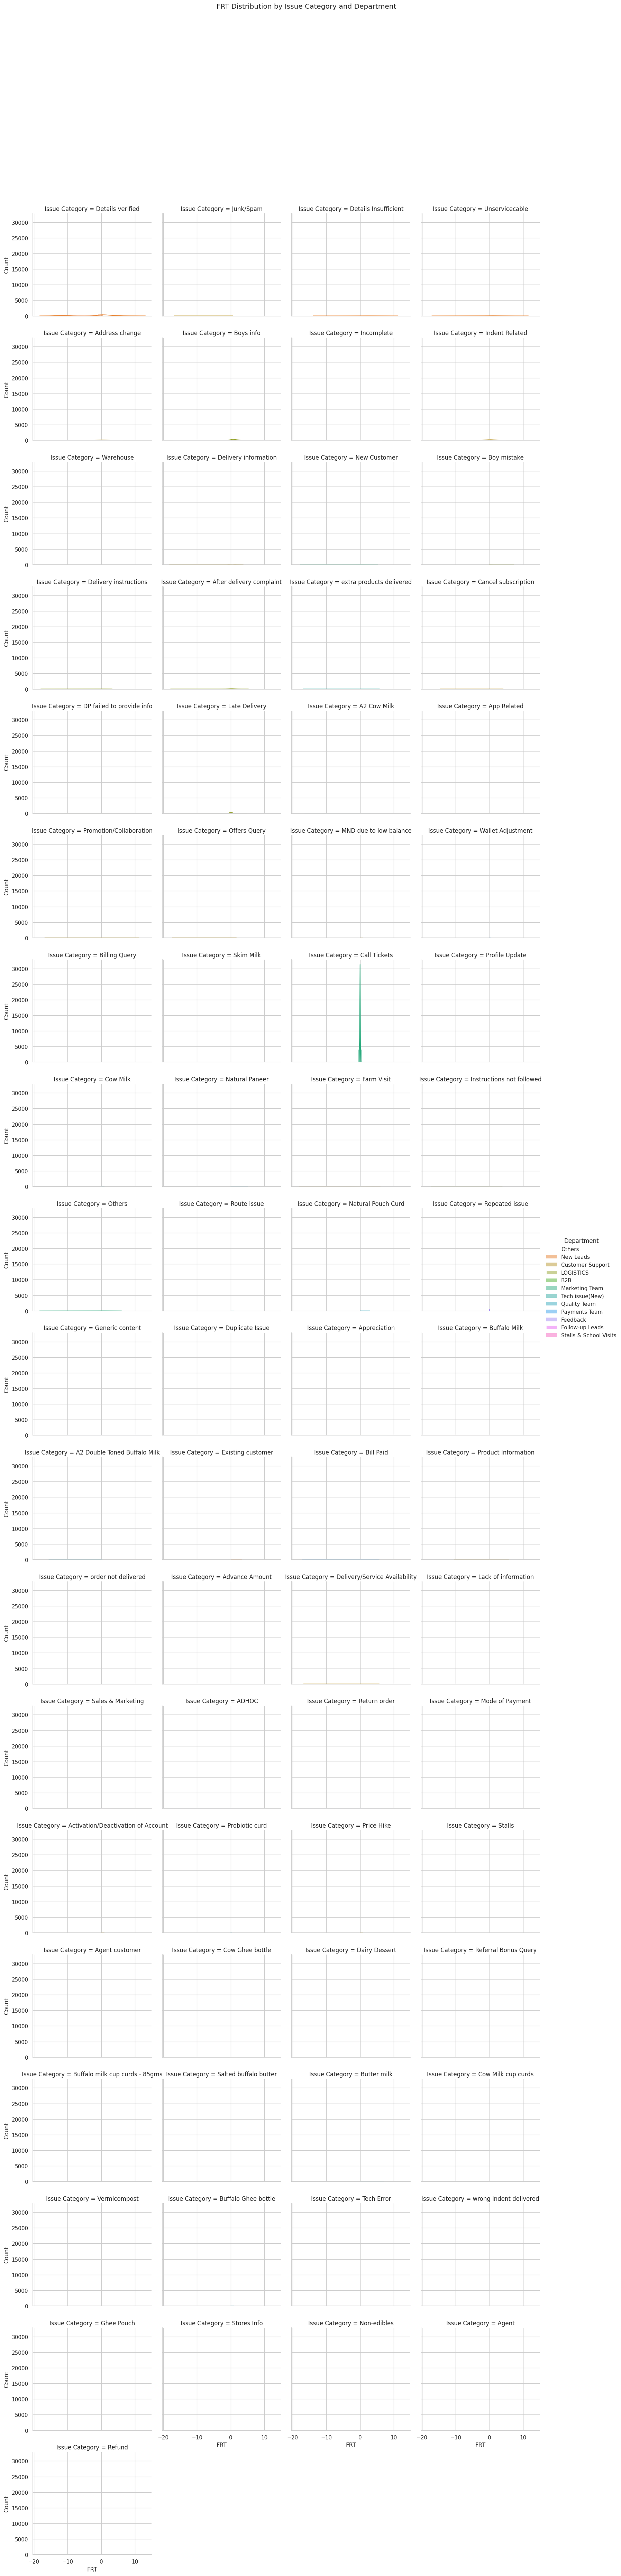

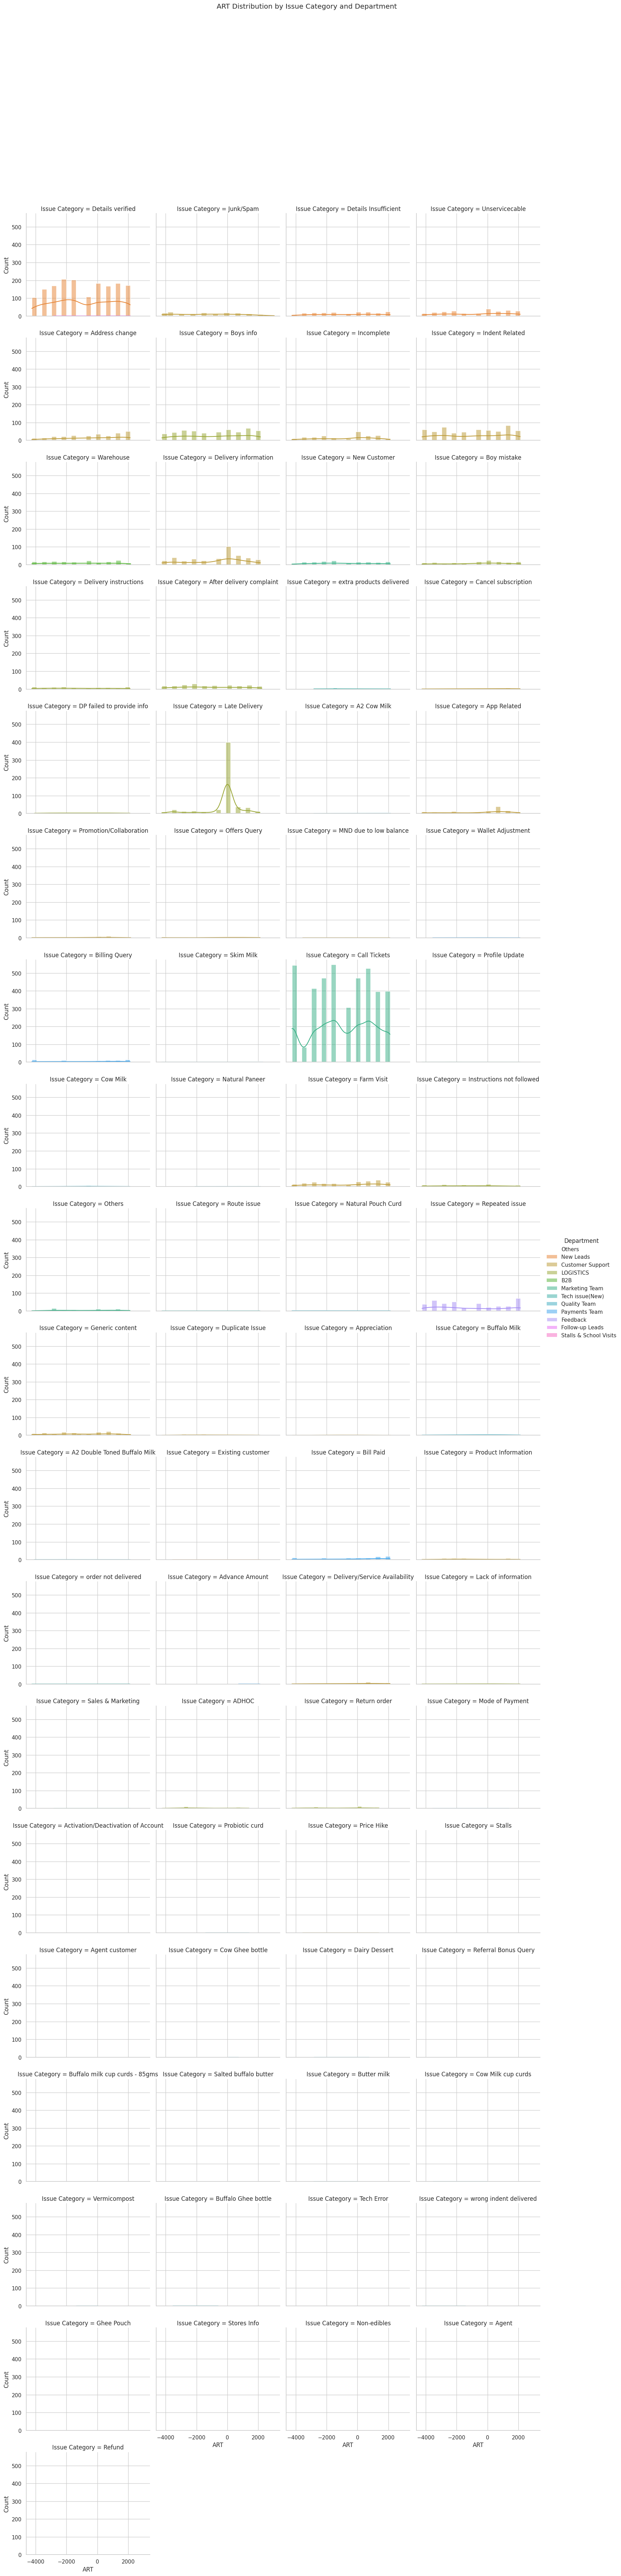

In [83]:
# Facet grid for FRT by Department and Issue Category
g = sns.FacetGrid(data, col="Issue Category", hue="Department", col_wrap=4, height=4)
g = g.map(sns.histplot, "FRT", bins=20, kde=True).add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('FRT Distribution by Issue Category and Department')
plt.show()

# Facet grid for ART by Department and Issue Category
g = sns.FacetGrid(data, col="Issue Category", hue="Department", col_wrap=4, height=4)
g = g.map(sns.histplot, "ART", bins=20, kde=True).add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('ART Distribution by Issue Category and Department')
plt.show()
